In [6]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


C:\Users\adm\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
#installation 
#conda install -c conda-forge ipywidgets
#conda install -c conda-forge python-graphviz 
#conda install -c conda-forge/label/cf201901 python-graphviz 


In [7]:
link = "G:/Machine learning with python/nba_logreg.csv"
data = pd.read_csv(link)
#specification of input and output variables 
X = data.iloc[:, 16:20].values  
y = data.iloc[:, 20].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
data.head()


,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [8]:
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80% trainset and 20% tes


In [10]:
 
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)
gini_y_pred = clf_gini.predict(X_test)
 
#decision Tree Classifier with criterion information gain
#http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)
ent_y_pred = clf_entropy.predict(X_test)
from sklearn.metrics import accuracy_score
acc_vec_dt=[accuracy_score(y_test,ent_y_pred), accuracy_score(y_test,gini_y_pred)] 

In [11]:
acc_vec_dt

[0.6305970149253731, 0.6305970149253731]

In [14]:
m=np.zeros((1,2))
ratio=[0.4,0.5,0.6,0.7,0.8,0.9]
for i in ratio:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=0) 
    clf_gini.fit(X_train, y_train)
    gini_y_pred = clf_gini.predict(X_test)
 
 
    clf_entropy.fit(X_train, y_train)
    ent_y_pred = clf_entropy.predict(X_test)
    acc_vec_dt=[accuracy_score(y_test,ent_y_pred), accuracy_score(y_test,gini_y_pred)] 
    m=np.append(m, [acc_vec_dt], axis=0)

In [15]:
m[1]

array([[0.        , 0.        ],
       [0.66977612, 0.66977612],
       [0.6358209 , 0.64626866],
       [0.61069652, 0.61069652],
       [0.63219616, 0.63219616],
       [0.62593284, 0.65764925],
       [0.54560531, 0.54560531]])

In [17]:
x=[0.4,0.5,0.6,0.7,0.8,0.9]
y1=m[1:7,0]
y2=m[1:7,1]
 

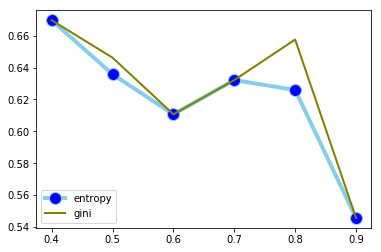

In [21]:
# multiple line plot
import matplotlib.pyplot as plt

plt.plot( x, y1,  marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,label="entropy")
plt.plot( x, y2,  marker='', color='olive', linewidth=2,label="gini")
plt.legend()
plt.show()